In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import pickle

# Environment settings
data_path = 'Data/'

In [9]:
data_type = {
    'PassengerId': str,
    'Survived': bool,
    'Pclass': 'category', # Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
    'Name': str,
    'Sex': 'category',
    'Age': float,
    'SibSp': 'uint8', # number of siblings/spouses aboard
    'Parch': 'uint8', # number of parents/children aboard
    'Ticket': str, # Ticket number
    'Fare': float, # Passenger fare
    'Cabin': str, # Cabin number
    'Embarked': 'category'} # Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

# load and serialize dataframes for later use in preprocessing notebook
for ds_name in ['test', 'train']: # last one is used in this document
    df = pd.read_csv('train.csv', dtype=data_type)
    #with open(data_path+ds_name+'_dv.obj', 'wb') as file:
        #pickle.dump(df, file)

In [3]:
data_type = {
    'PassengerId': str,
    'Survived': bool,
    'Pclass': 'category', # Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
    'Name': str,
    'Sex': 'category',
    'Age': float,
    'SibSp': 'uint8', # number of siblings/spouses aboard
    'Parch': 'uint8', # number of parents/children aboard
    'Ticket': str, # Ticket number
    'Fare': float, # Passenger fare
    'Cabin': str, # Cabin number
    'Embarked': 'category'} # Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

# load and serialize dataframes for later use in preprocessing notebook
for ds_name in ['test', 'train']: # last one is used in this document
    df = pd.read_csv(data_path+ds_name+'.csv', dtype=data_type)
    with open(data_path+ds_name+'_dv.obj', 'wb') as file:
        pickle.dump(df, file)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/test.csv'

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#view the data
df.head(5)
# Step-1: Remove columns that are of no use
# Step-2: Remove column Cabin    100 = 100
# Step-3: Remove rows with missing values  100 = 80%


# Scenario-2
# Step-1: Remove columns that are of no use 33 ----> 20 train 13 test
# Step-2: Remove rows with missing values 100 = 77
# Step-3: Remove column Cabin ----- No Relevance

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,False,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


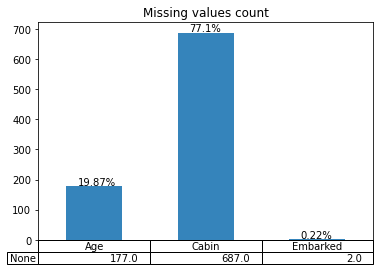

In [10]:
# Missing values

# number of rows
rows_length = df.shape[0]
# fields with missing value count
fields_with_nan_length = df.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

In [13]:
# some statistics about the numerical data
df.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


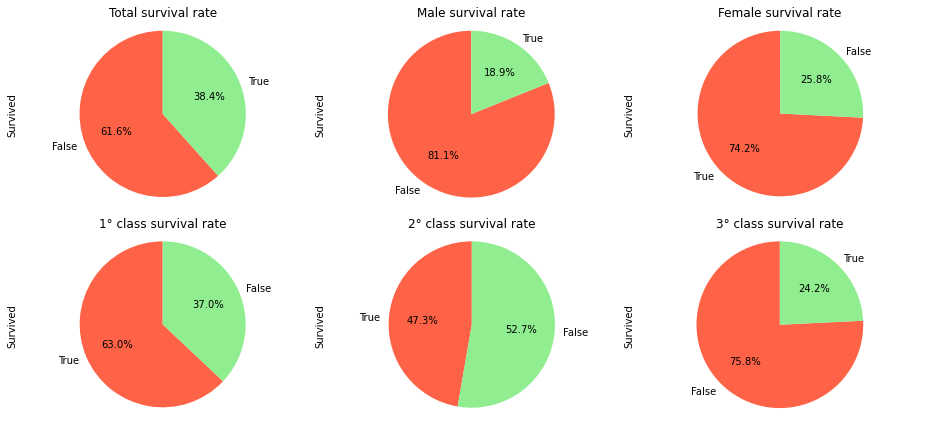

In [14]:
# Specifies the parameters of our graphs
plt.figure(figsize=(13,6))
plot_params = {
    'kind': 'pie',
    'startangle': 90,
    'autopct': '%1.1f%%',
    'colors': ['tomato', 'lightgreen']
}


# Plots a bar graph of those who surived vs those who did not
plt.subplot2grid((2,3), (0,0))
df.Survived.value_counts() \
.plot(title='Total survival rate', **plot_params).axis('equal')


# Survival rate wrt Sex
df_male = df.Survived[df.Sex == 'male'].value_counts(normalize=True, sort=False)
df_female = df.Survived[df.Sex == 'female'].value_counts(normalize=True, sort=False)

## male survival plot
plt.subplot2grid((2,3),(0,1))
df_male.plot(title='Male survival rate', **plot_params).axis('equal')

## female survival plot
plt.subplot2grid((2,3),(0,2))
df_female.plot(title='Female survival rate', **plot_params).axis('equal')


# Survival rate wrt Pclass
for i in range(3):
    plt.subplot2grid((2,3),(1,i))
    df.Survived[df.Pclass == str(i+1)].value_counts(normalize=True, sort=False) \
    .plot(title=str(i+1)+'° class survival rate', **plot_params).axis('equal')

plt.tight_layout()
plt.show()

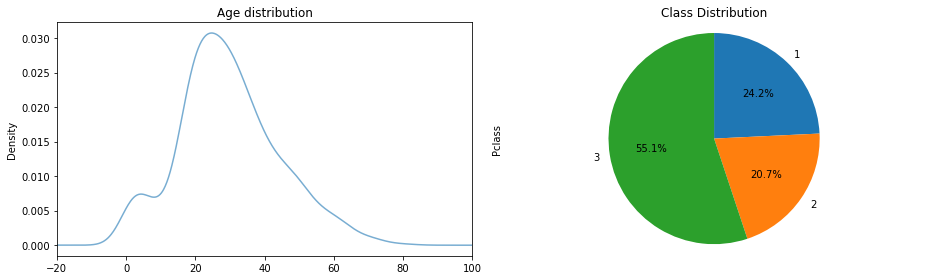

In [15]:
plt.figure(figsize=(13,4))

# plots a bar graph of the age distribution
plt.subplot2grid((1,2), (0,0))
df.Age.plot(kind='kde', alpha=0.6, title='Age distribution', xlim=(-20, 100))

# plots a bar graph of the class distribution
plt.subplot2grid((1,2),(0,1))
df.Pclass.value_counts(sort=False).plot(kind='pie', title='Class Distribution', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')

plt.tight_layout()
plt.show()

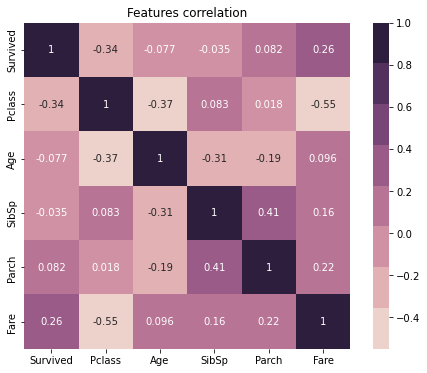

In [16]:
fig = plt.figure(figsize=(8,6))

#Correlation between features
df['Pclass'] = pd.to_numeric(df['Pclass']) # hack for seaborn to process categorical data

cov_matrix = df.corr(method='pearson')
sns.heatmap(cov_matrix, square=True, annot=True, cmap=sns.cubehelix_palette(8)) \
.set_title('Features correlation');

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sn
import pickle

# Environment settings
data_path = 'Data/'

In [8]:
data_type = {
    'PassengerId': str,
    'Survived': bool,
    'Pclass': 'category', # Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
    'Name': str,
    'Sex': 'category',
    'Age': float,
    'SibSp': 'uint8', # number of siblings/spouses aboard
    'Parch': 'uint8', # number of parents/children aboard
    'Ticket': str, # Ticket number
    'Fare': float, # Passenger fare
    'Cabin': str, # Cabin number
    'Embarked': 'category'} # Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

# load and serialize dataframes for later use in preprocessing notebook
for ds_name in ['test', 'train']: # last one is used in this document
   ''' df = pd.read_csv(data_path+ds_name+'.csv', dtype=data_type)
    with open(data_path+ds_name+'_dv.obj', 'wb') as file:
        pickle.dump(df, file) '''

In [7]:
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [26]:
df.shape

(891, 12)

In [28]:
df.size

10692

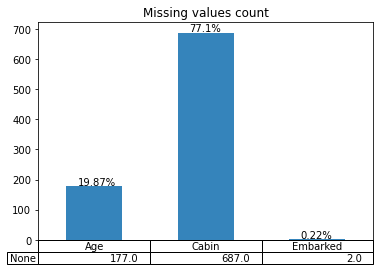

In [24]:
# Missing values

# number of rows
rows_length = df.shape[0]
# fields with missing value count
fields_with_nan_length = df.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

In [ ]:
# Missing values

# number of rows
rows_length = df.shape[0]
# fields with missing value count
fields_with_nan_length = df.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

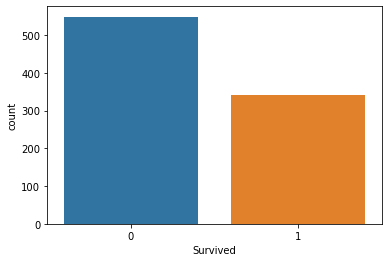

In [10]:
#countplot of subrised us not survised
sn.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

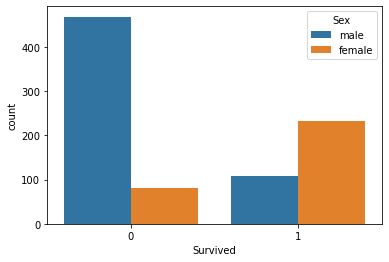

In [11]:
#male VS female survived
sn.countplot(x='Survived',data=df,hue='Sex')

In [12]:
#check for null
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#check how many values are null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

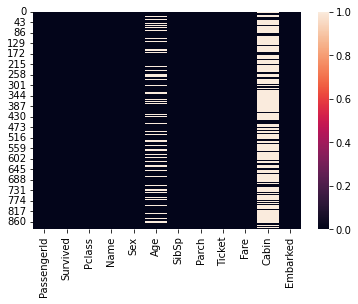

In [15]:
#visualize null values
sn.heatmap(df.isna())

In [16]:
#find the % of null values in age column
df['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [18]:
df['Age'].isna().sum()

177

In [19]:
df['Age'].isna().sum()/len(df['Age'])

0.19865319865319866

In [20]:
df['Age'].isna().sum()/len(df['Age'])*100

19.865319865319865

In [8]:
df['Cabin'].isna().sum/len(df['Cabin'])*100

TypeError: unsupported operand type(s) for /: 'method' and 'int'